In [12]:
import pandas as pd
import pandas_datareader as pdr

from statsmodels.tsa.ar_model import AutoReg

In [58]:
data = pdr.get_data_fred('HOUSTNSA','1960-01-01','2020-12-01')
housing = 100*data.HOUSTNSA.pct_change().dropna()


## Plotting

<AxesSubplot:xlabel='DATE'>

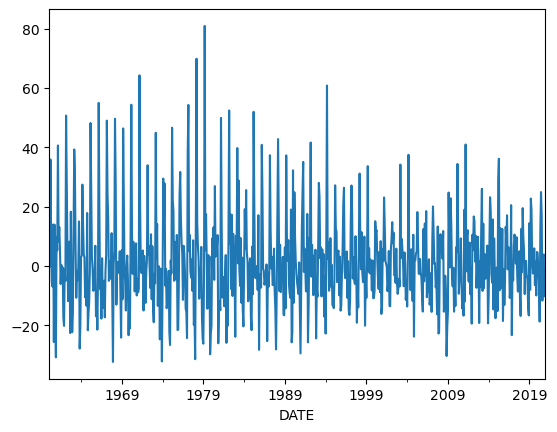

In [20]:
# if index is not date, please set index as date first before plot
housing.plot() 

<AxesSubplot:xlabel='date', ylabel='HOUSTNSA'>

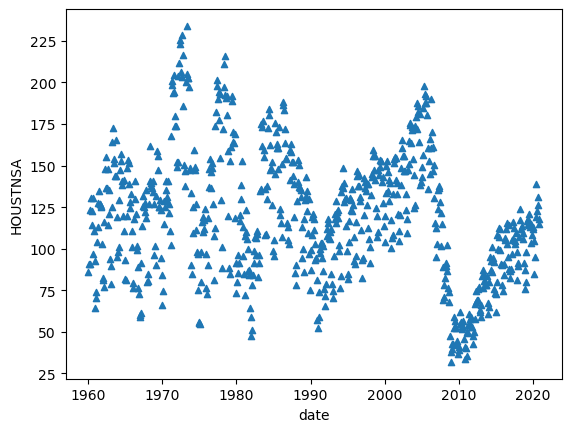

In [38]:
data['date'] = pd.to_datetime(data.index)
data.plot(x = 'date', y = 'HOUSTNSA', kind = 'scatter', marker = '^')


array([[<AxesSubplot:title={'center':'doy'}>]], dtype=object)

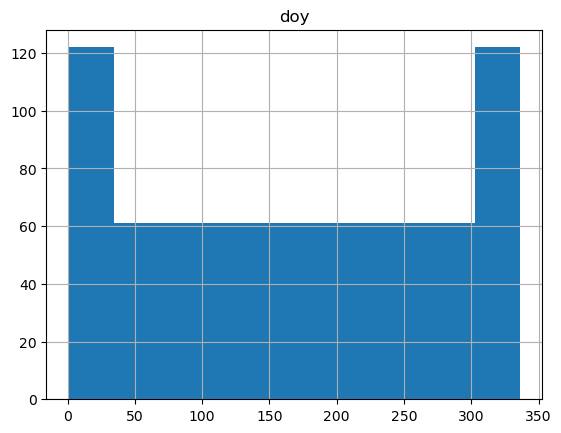

In [45]:
data['doy'] = data.date.apply(lambda x: x.dayofyear)
# data.plot(kind = 'hist', y = 'doy')
data.hist('doy')

C:\Users\jinfe\AppData\Local\Temp\ipykernel_18168\376236293.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.hist('HOUSTNSA', by = 'quarter')


array([[<AxesSubplot:title={'center':'1'}>,
        <AxesSubplot:title={'center':'2'}>],
       [<AxesSubplot:title={'center':'3'}>,
        <AxesSubplot:title={'center':'4'}>]], dtype=object)

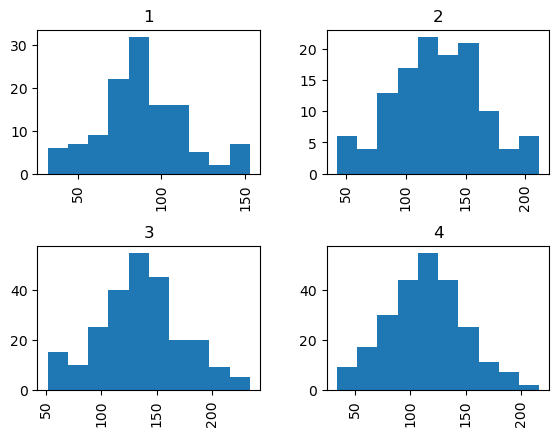

In [48]:
data['quarter'] = pd.cut(data.doy, [-1, 50, 120, 220, 400], labels = [1,2,3,4])
data = data.set_index('date')
data.hist('HOUSTNSA', by = 'quarter')

## Fit Regression
Generate lag values:

In [16]:
df = housing.shift(3).to_frame('S3')
df['S2'] = housing.shift(2)
df['S1'] = housing.shift(1)
X = df.fillna(0).values
y = housing.values

Fit auto regression

In [49]:
mod = AutoReg(housing, 3)
res = mod.fit()
print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:               HOUSTNSA   No. Observations:                  731
Model:                     AutoReg(3)   Log Likelihood               -3015.486
Method:               Conditional MLE   S.D. of innovations             15.229
Date:                Wed, 03 Jul 2024   AIC                           6040.971
Time:                        15:23:31   BIC                           6063.923
Sample:                    05-01-1960   HQIC                          6049.827
                         - 12-01-2020                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.1511      0.568      2.025      0.043       0.037       2.265
HOUSTNSA.L1     0.1896      0.036      5.231      0.000       0.119       0.261
HOUSTNSA.L2    -0.0006      0.037     -0.016    

c:\Users\jinfe\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


# Decomposition

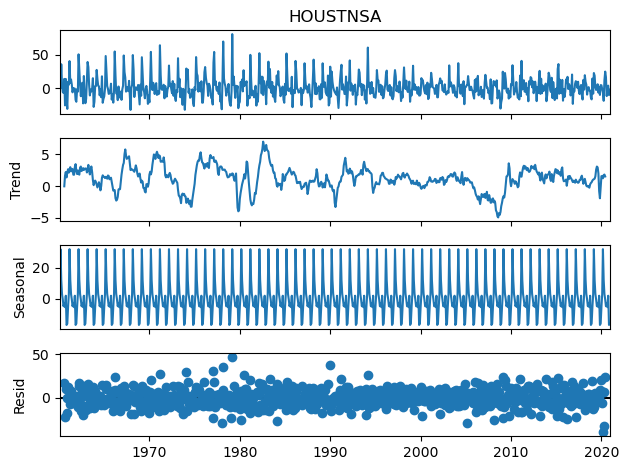

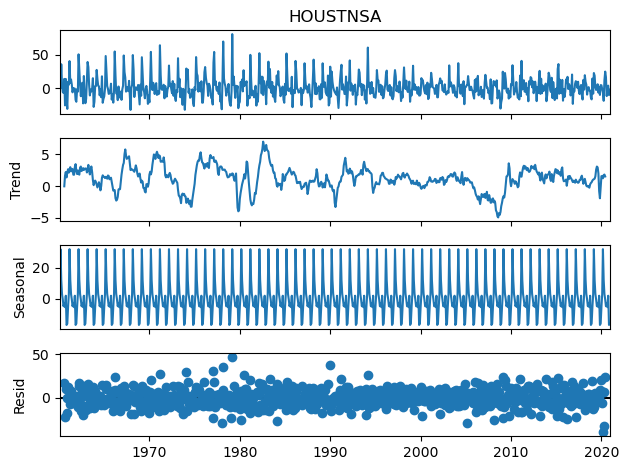

In [51]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomp = seasonal_decompose(housing)
decomp.plot()

<AxesSubplot:xlabel='DATE'>

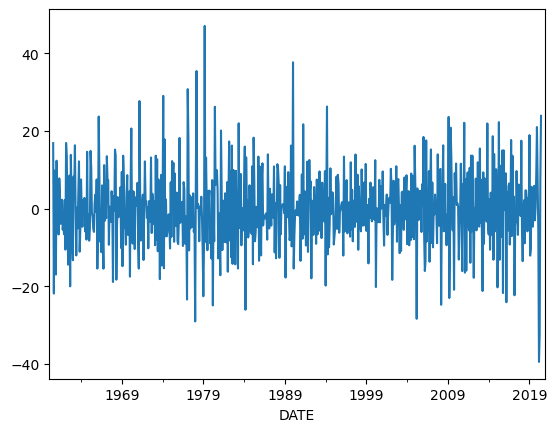

In [53]:
decomp.resid.plot()

<AxesSubplot:xlabel='DATE'>

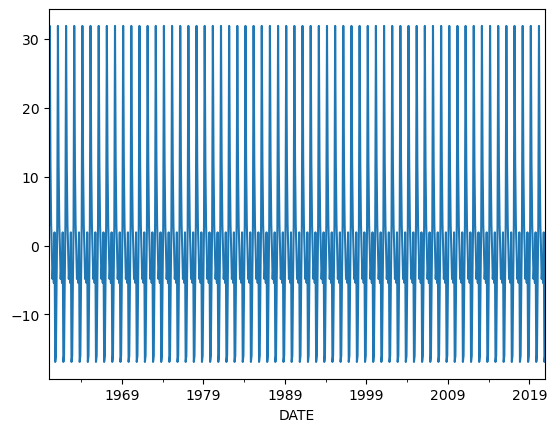

In [55]:
decomp.seasonal.plot()

In [72]:
# 
data = pdr.get_data_fred('HOUSTNSA','1960-01-01','2020-12-01')
data = data.reset_index()
data.groupby(data.DATE.apply(lambda x: x.year)).mean()




,DATE,HOUSTNSA
DATE,,
1960,1960-06-16 08:00:00,104.341667
1961,1961-06-16 12:00:00,109.416667
1962,1962-06-16 12:00:00,121.900000
1963,1963-06-16 12:00:00,133.591667
1964,1964-06-16 08:00:00,127.408333
...,...,...
2016,2016-06-16 08:00:00,97.808333
2017,2017-06-16 12:00:00,100.241667
2018,2018-06-16 12:00:00,104.166667


In [78]:
years = pd.DataFrame(index = range(1,13))
for name, yr in data.groupby(data.DATE.apply(lambda x: x.year)):
    years[name] = yr.HOUSTNSA.values
    # print(name, yr)

years

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
1,86.0,70.4,81.2,79.0,97.9,81.7,79.4,59.1,80.5,101.5,...,40.2,47.2,58.7,60.7,73.0,74.3,82.3,91.6,87.0,113.1
2,90.7,74.1,77.1,89.6,101.3,80.9,76.2,61.4,84.6,90.1,...,35.4,49.7,66.1,65.1,61.9,84.1,87.8,89.7,80.0,111.6
3,90.5,104.2,116.2,124.8,129.1,119.9,118.1,91.5,126.6,131.9,...,49.9,58.0,83.3,80.2,79.7,90.7,97.1,107.2,98.2,104.5
4,123.0,112.8,147.8,164.2,147.1,148.6,140.9,113.7,162.0,159.0,...,49.0,66.8,76.3,94.9,108.5,106.2,105.2,117.5,116.6,84.9
5,130.2,127.6,155.2,172.7,152.8,153.3,130.0,132.0,140.9,155.5,...,54.0,67.8,87.2,92.5,99.6,105.0,106.0,123.7,118.1,95.1
6,122.8,134.8,136.8,154.2,157.2,151.8,120.6,125.4,137.9,147.3,...,60.5,74.7,80.7,87.3,112.3,111.6,116.3,112.0,115.1,118.8
7,114.3,126.6,136.5,151.3,140.6,139.1,99.2,125.3,139.8,125.2,...,57.6,69.2,84.0,101.0,107.2,115.2,112.3,111.9,114.2,138.7
8,130.3,127.1,147.7,144.0,138.3,128.3,101.8,127.4,136.6,124.9,...,54.5,69.0,80.4,86.2,99.2,102.8,102.6,113.8,121.0,122.5
9,96.9,125.4,114.3,143.7,119.8,124.6,89.1,121.9,134.2,129.3,...,58.8,75.8,78.4,94.2,111.6,95.0,104.4,109.7,113.2,126.3
10,110.4,124.8,135.2,165.3,141.2,133.1,76.6,135.4,140.8,123.4,...,53.2,77.0,78.4,92.0,90.9,114.5,109.6,105.7,114.8,131.2


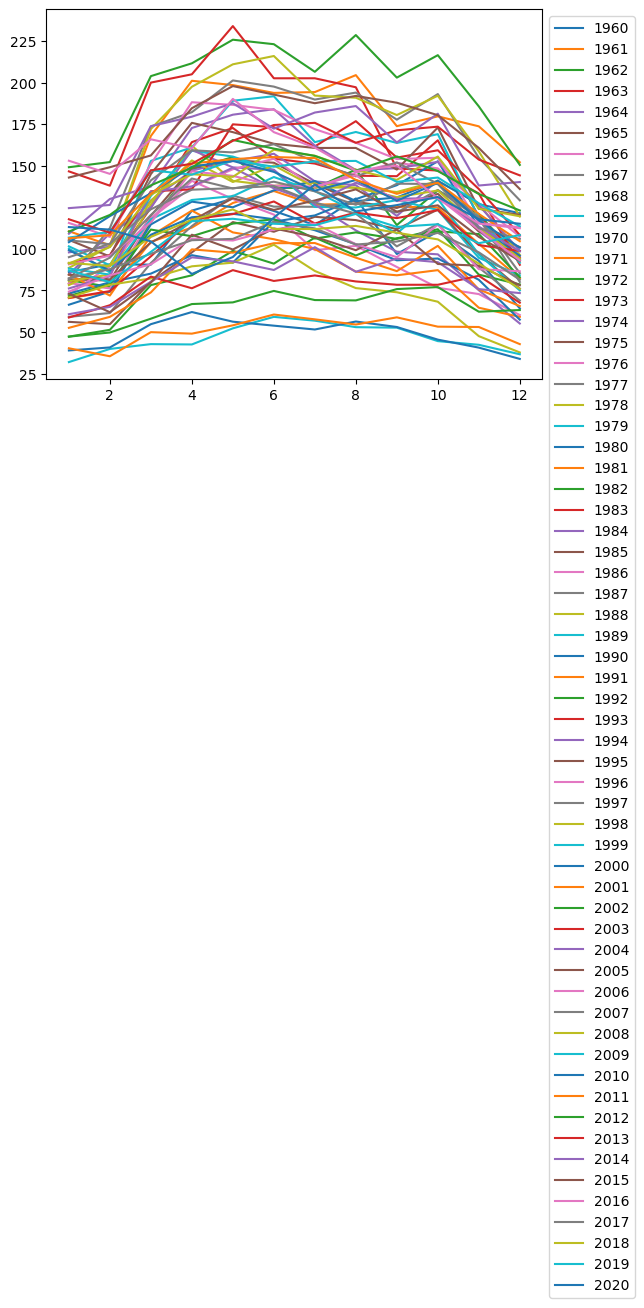

In [80]:
years.plot().legend(bbox_to_anchor=(1,1))

In [81]:
years.corr()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
1960,1.000000,0.784978,0.862570,0.827017,0.903535,0.797469,0.733549,0.731712,0.753360,0.807178,...,0.606076,0.533220,0.601134,0.676957,0.685097,0.764786,0.803497,0.902671,0.645679,-0.109394
1961,0.784978,1.000000,0.888712,0.926203,0.879811,0.912215,0.547482,0.952736,0.880870,0.750738,...,0.939484,0.895139,0.830453,0.897171,0.883356,0.879178,0.942595,0.817612,0.865088,0.222636
1962,0.862570,0.888712,1.000000,0.937558,0.907363,0.938827,0.691267,0.904504,0.931233,0.803829,...,0.769973,0.732526,0.817334,0.840564,0.795367,0.839318,0.830030,0.841526,0.881947,-0.100128
1963,0.827017,0.926203,0.937558,1.000000,0.926484,0.957914,0.663825,0.917368,0.943297,0.850304,...,0.788295,0.831633,0.786628,0.923333,0.822409,0.906020,0.906903,0.869519,0.847169,-0.037106
1964,0.903535,0.879811,0.907363,0.926484,1.000000,0.942617,0.801256,0.798213,0.862054,0.906993,...,0.732941,0.679661,0.729485,0.801461,0.755961,0.885231,0.911191,0.909600,0.727963,-0.102554
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,0.764786,0.879178,0.839318,0.906020,0.885231,0.884118,0.502712,0.847029,0.831103,0.687809,...,0.735637,0.826183,0.676670,0.890220,0.752760,1.000000,0.916020,0.721474,0.793676,0.220319
2017,0.803497,0.942595,0.830030,0.906903,0.911191,0.890064,0.581436,0.884147,0.863774,0.760298,...,0.873397,0.810457,0.775301,0.866426,0.842404,0.916020,1.000000,0.811187,0.720834,0.214326
2018,0.902671,0.817612,0.841526,0.869519,0.909600,0.845506,0.849512,0.715701,0.814046,0.937458,...,0.676514,0.553463,0.681923,0.782373,0.737406,0.721474,0.811187,1.000000,0.638494,-0.180906
2019,0.645679,0.865088,0.881947,0.847169,0.727963,0.868056,0.444270,0.888539,0.841031,0.638629,...,0.801631,0.887268,0.671739,0.851001,0.853999,0.793676,0.720834,0.638494,1.000000,0.096440


# PACF/ACF

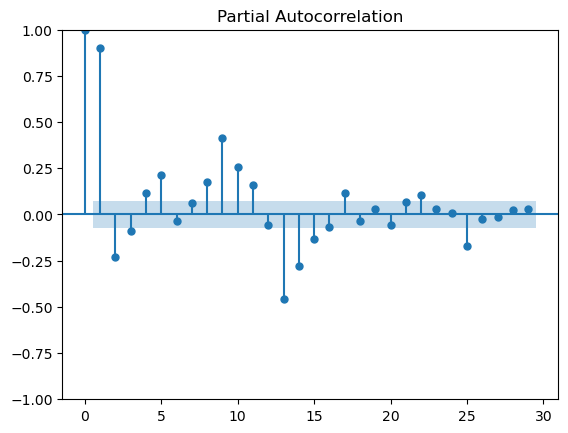

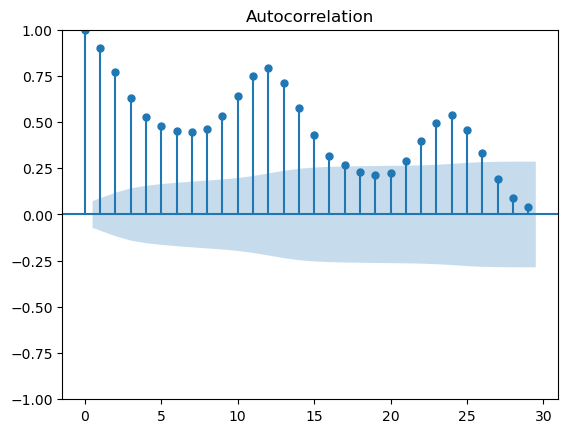

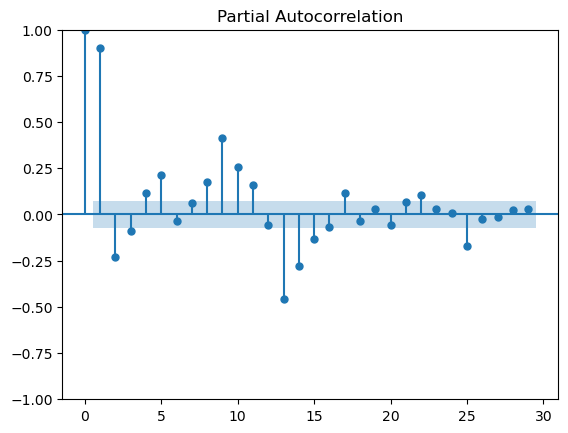

In [83]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(data.HOUSTNSA)
plot_pacf(data.HOUSTNSA)

# Autocorrelation

In [84]:
data.HOUSTNSA.autocorr(12)

0.7968105888602361

In [85]:
data.HOUSTNSA.autocorr(3)

0.6307632325265508

<AxesSubplot:>

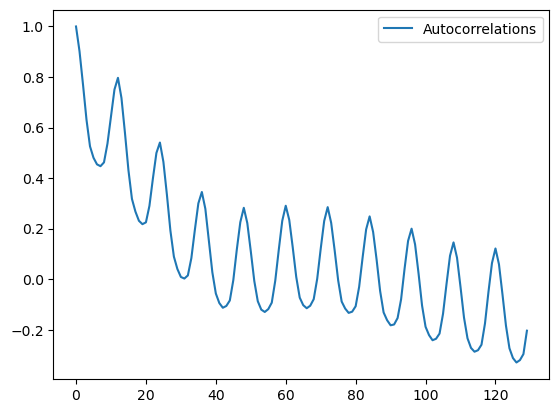

In [86]:
acs = pd.DataFrame({'Autocorrelations': [data.HOUSTNSA.autocorr(n) for n in range(130)]})
acs.plot()

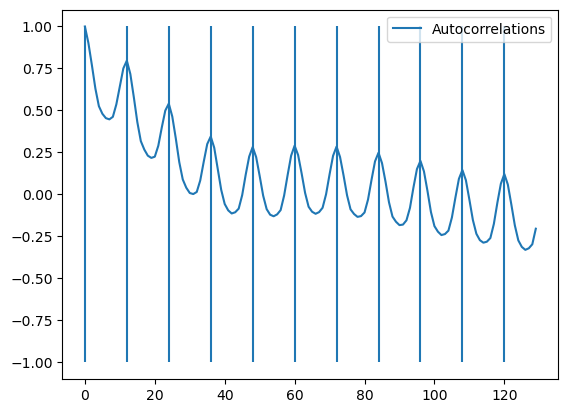

In [87]:
acs.plot().vlines(range(0,130,12), -1, 1)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

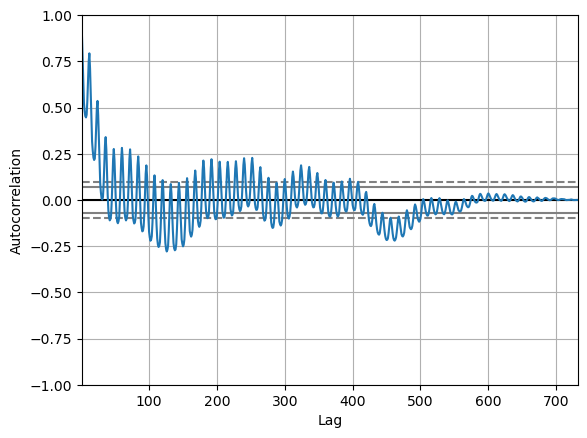

In [88]:
# another way to plot auto correlation:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(data.HOUSTNSA)

Since there is trend in this plot, so the autocorrelation plot may mislead, we need to use decomposition to remove trend and only use seasonal part to do autocorrelation plot:

<AxesSubplot:xlabel='DATE'>

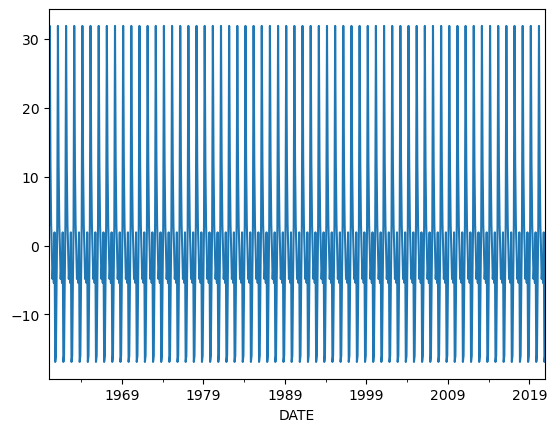

In [90]:
decomp.seasonal.plot()

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

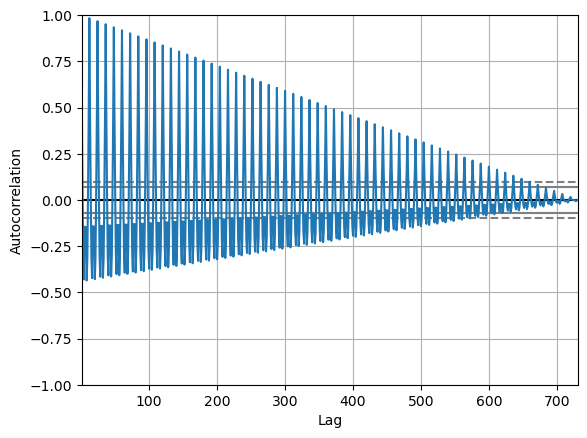

In [91]:
autocorrelation_plot(decomp.seasonal)